# Introduction 

This is the Machine Learning with Python Project created by our team on the topic of "Analysis of Amazon Sales Report".<br>
Our team:<br>
- Ayan Kundu (10800222015)
- Moupiya Das (10800222020)
- Neelofar Yasmeen (10800222022)

has worked hard on this project and hope to satisfy all the requirements of this assignment.

# Project Details

This project has multiple parts focusing on each important sections.<br> 
The list of all the sections are given below:
- Import Libraries and Load Data
- Initial Data Exploration and Visualization
- Data Cleaning and Preprocessing
- K-Means Clustering Model
- K-Nearest Neighbors (KNN) Model
- Random Forest Model
- Linear Regression Model
- Linear Regression Model
- Comparison in Performance

Hope these section wise approach helps with easier conveying of our project!


## Import Libraries and Load Data

Here we are importing all the required modules and saving a copy of the data from the csv file.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

data = pd.read_csv('AmazonSaleReport.csv')
data.head()


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


## Initial Data Exploration and Visualization

Here we take our first look at the data set.<br>
Histograms show the distribution of numerical variables like Amount and Qty, helping understand their spread and typical values.<br>
The count plot for Status reveals how frequently each order status appears (e.g., shipped vs. other statuses).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

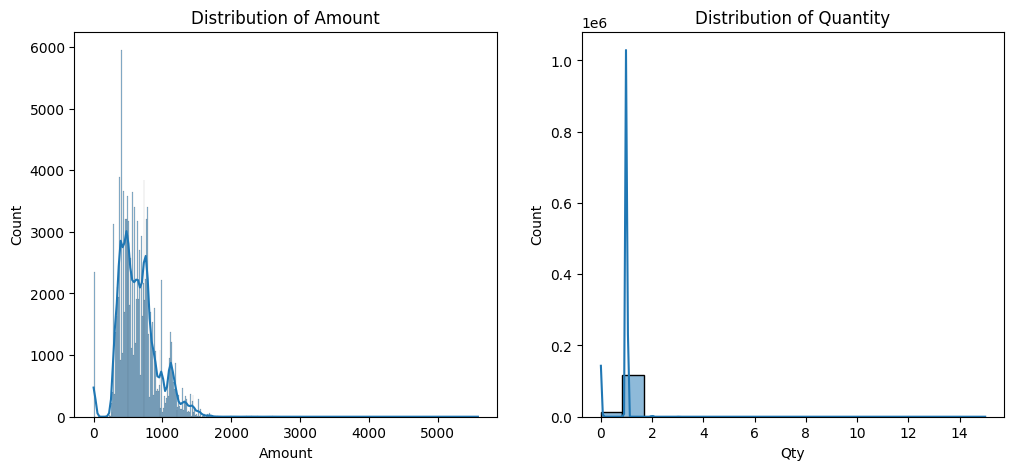

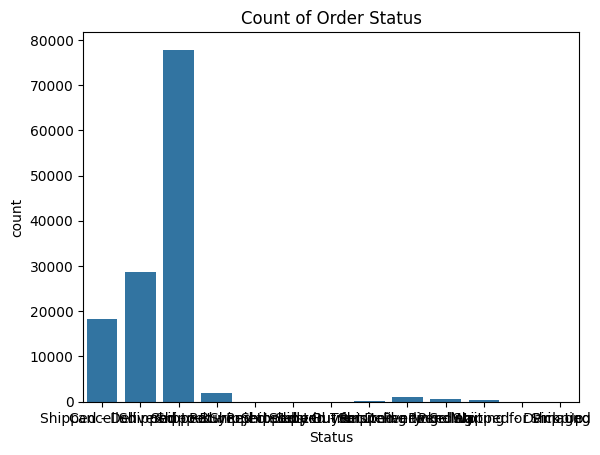

In [37]:
data.info()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Amount'], kde=True)
plt.title('Distribution of Amount')
plt.subplot(1, 2, 2)
sns.histplot(data['Qty'], kde=True)
plt.title('Distribution of Quantity')
plt.show()
sns.countplot(x='Status', data=data)
plt.title("Count of Order Status")
plt.show()


## Data Cleaning and Preprocessing

Here we cleaned our dataset for farther uses.


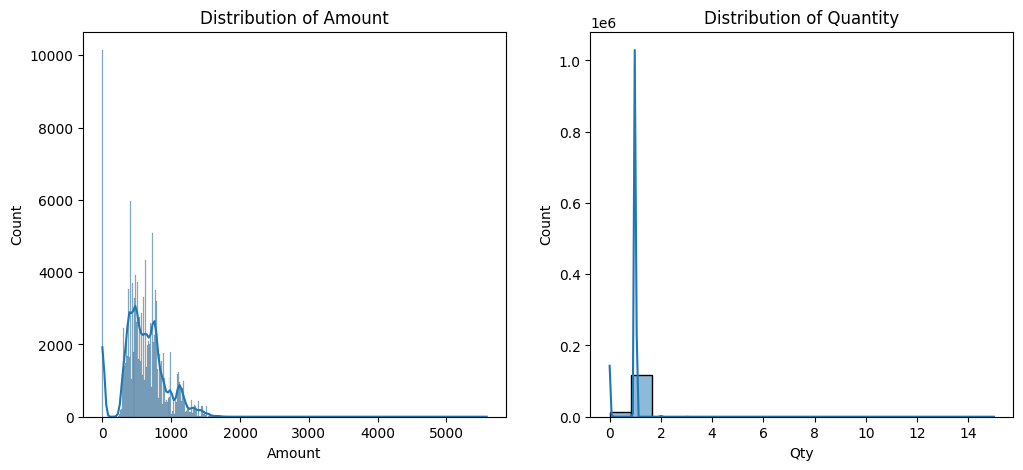

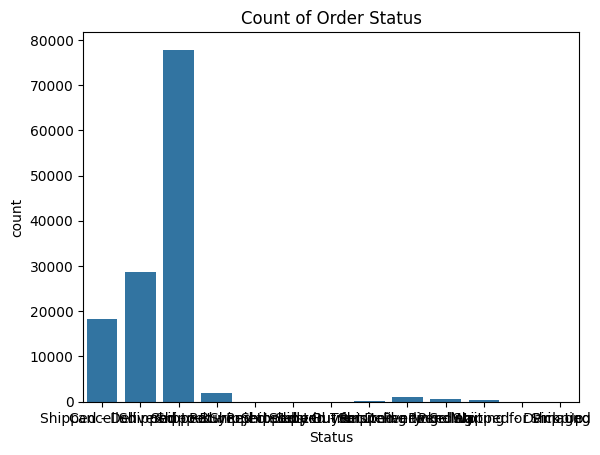

In [38]:
data = data.drop(columns=["New", "PendingS"], errors='ignore')
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d', errors='coerce')
data['Amount'] = data['Amount'].fillna(0)
data = data.dropna(subset=['Status'])
data['Status_encoded'] = data['Status'].apply(lambda x: 1 if 'Shipped' in x else 0)
features = pd.get_dummies(data[['Qty', 'Amount']], drop_first=True)
target = data['Status_encoded']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Amount'], kde=True)
plt.title('Distribution of Amount')
plt.subplot(1, 2, 2)
sns.histplot(data['Qty'], kde=True)
plt.title('Distribution of Quantity')
plt.show()
sns.countplot(x='Status', data=data)
plt.title("Count of Order Status")
plt.show()

## K-Means Clustering Model

K-Means clustering will help identify natural groupings in the data based on Qty and Amount, potentially uncovering hidden patterns, like clusters of orders with similar quantities and amounts.

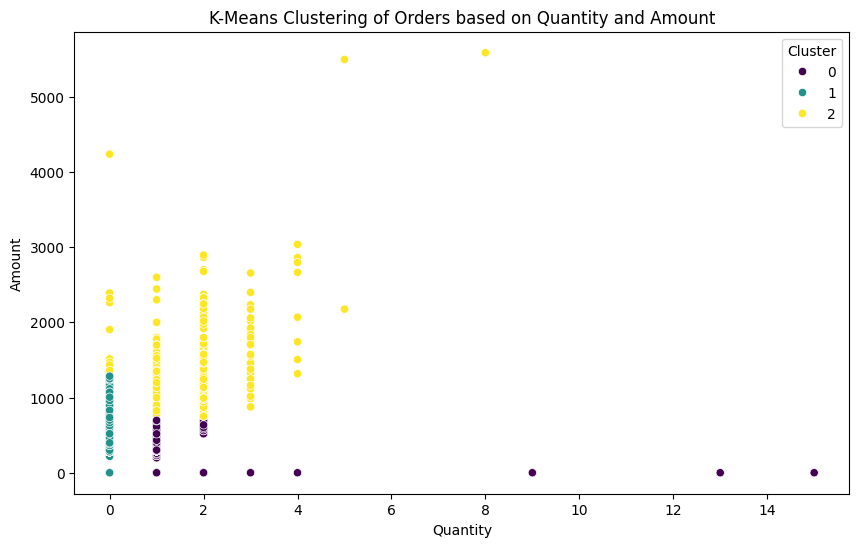

Cluster Centers:
[[ 1.00087574e+00  4.78083100e+02]
 [-1.99840144e-14  2.44949803e+02]
 [ 1.00871884e+00  9.39672354e+02]]


In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['Qty', 'Amount']])
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Qty', y='Amount', hue='Cluster', data=data, palette='viridis')
plt.title("K-Means Clustering of Orders based on Quantity and Amount")
plt.xlabel("Quantity")
plt.ylabel("Amount")
plt.legend(title="Cluster")
plt.show()
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))


## K-Nearest Neighbors (KNN) Model

This model classifies orders based on Qty and Amount to predict whether an order status is “Shipped” or not.

KNN Model Accuracy: 0.9431938593544051


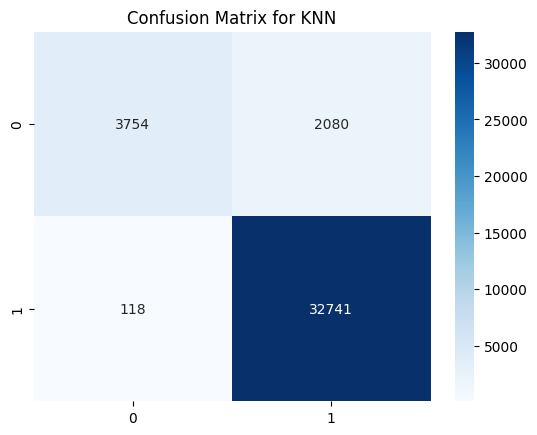

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Model Accuracy:", accuracy_score(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for KNN")
plt.show()


## Random Forest Model

 Like KNN, Random Forest predicts whether an order status is “Shipped” or not. It uses multiple decision trees to improve accuracy and capture complex patterns in the data.

Random Forest Accuracy: 0.9470963740211408


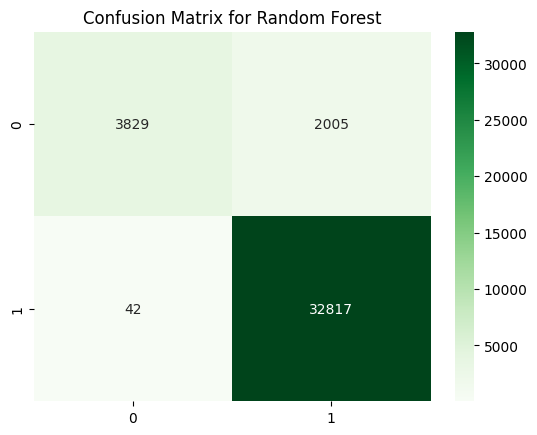

In [41]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix for Random Forest")
plt.show()


## Linear Regression Model

This model uses Qty to predict the Amount, treating Amount as a continuous variable. This can help understand how quantity affects sales amount in general.

Linear Regression MSE: 83885.2308043057


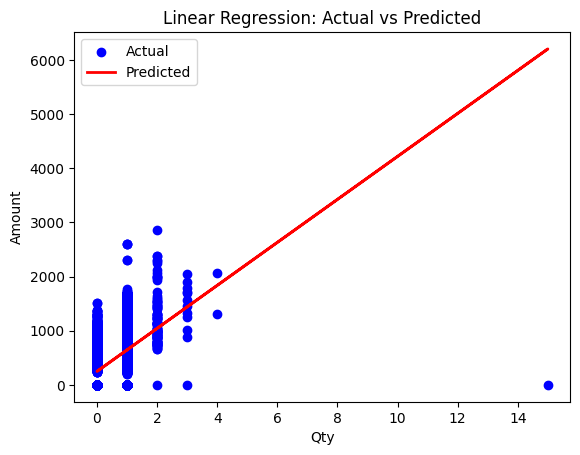

In [42]:
X_reg = data[['Qty']]
y_reg = data['Amount']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train_reg, y_train_reg)
y_pred_lr = linear_model.predict(X_test_reg)
print("Linear Regression MSE:", mean_squared_error(y_test_reg, y_pred_lr))
plt.scatter(X_test_reg, y_test_reg, color="blue", label="Actual")
plt.plot(X_test_reg, y_pred_lr, color="red", linewidth=2, label="Predicted")
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Qty")
plt.ylabel("Amount")
plt.legend()
plt.show()


## Logistic Regression

Similar to KNN and Random Forest, Logistic Regression predicts whether the order status is “Shipped” based on Qty and Amount. This model is particularly good for binary classification.

Logistic Regression Accuracy: 0.9473806631690487


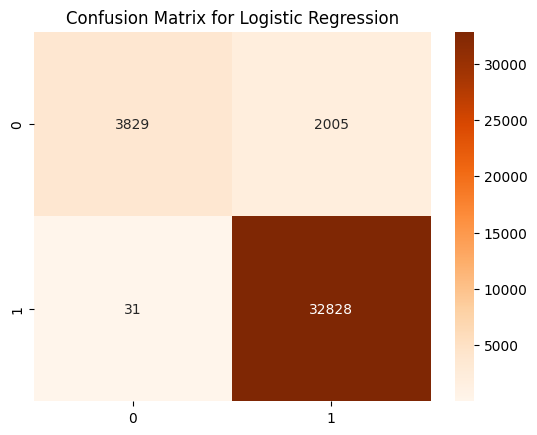

In [43]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_log = logistic_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


## Comparison in Performance

The classification report for each model (KNN, Random Forest, and Logistic Regression) allows you to compare their effectiveness in predicting the shipping status.<br>
It helps us gain insight into which model performed best on this dataset in terms of accuracy and the balance between correctly identifying shipped and non-shipped statuses.

In [44]:
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))
print("\nK-Means Clustering Summary:")
print("Number of Clusters: 3")
print("Cluster Sizes:", data['Cluster'].value_counts().to_dict())
print("Cluster Centers (Qty and Amount):\n", scaler.inverse_transform(kmeans.cluster_centers_))


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.64      0.77      5834
           1       0.94      1.00      0.97     32859

    accuracy                           0.94     38693
   macro avg       0.95      0.82      0.87     38693
weighted avg       0.94      0.94      0.94     38693

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.66      0.79      5834
           1       0.94      1.00      0.97     32859

    accuracy                           0.95     38693
   macro avg       0.97      0.83      0.88     38693
weighted avg       0.95      0.95      0.94     38693

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.66      0.79      5834
           1       0.94      1.00      0.97     32859

    accuracy                           0.95     38693
   macro avg      